In [1]:
import pandas as pd
import numpy as np
import os
from shutil import copyfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Đọc tệp CSV
input_data = pd.read_csv('input.csv')
labels = pd.read_csv('labels.csv')
input_test = pd.read_csv('input_test.csv')
labels_test = pd.read_csv('labels_test.csv')

In [3]:
# Hiển thị dữ liệu
print(input_data.head())
print(labels.head())
print(input_test.head())
print(labels_test.head())

   3.700000000000000000e+01  3.900000000000000000e+01  \
0                     131.0                     128.0   
1                      80.0                      92.0   
2                     149.0                     173.0   
3                     255.0                     254.0   
4                     111.0                     117.0   

   2.500000000000000000e+01  2.600000000000000000e+01  \
0                     135.0                     160.0   
1                      88.0                      83.0   
2                     151.0                     131.0   
3                     239.0                     253.0   
4                     117.0                     107.0   

   2.400000000000000000e+01  9.000000000000000000e+00  \
0                     157.0                     164.0   
1                      96.0                      89.0   
2                     153.0                     132.0   
3                     246.0                     228.0   
4                     113.0  

In [4]:
X_train = np.array(input_data)
Y_train = np.array(labels)
X_test = np.array(input_test)
Y_test = np.array(labels_test)

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100,3) 
Y_train = Y_train.reshape(len(Y_train), 1)

In [6]:
X_test = X_test.reshape(len(X_test), 100, 100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
print(X_train.shape)
print(X_test.shape)

(1999, 100, 100, 3)
(399, 100, 100, 3)


In [9]:
# Định nghĩa mô hình
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [10]:
optimizers = [Adam()]
optimizer_names = ['Adam']
accuracies = []

In [11]:
# Biên dịch và huấn luyện mô hình với từng thuật toán
for optimizer in optimizers:
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

    # In kết quả
    loss, accuracy = model.evaluate(X_test, Y_test)
    accuracies.append(accuracy)
    print(f'Optimizer: {optimizer.get_config()["name"]}, Accuracy: {accuracy}')

C:\Users\ProTech Computer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.4949 - loss: 0.6959 - val_accuracy: 0.5489 - val_loss: 0.6917
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5160 - loss: 0.6863 - val_accuracy: 0.5013 - val_loss: 0.6886
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.5531 - loss: 0.6789 - val_accuracy: 0.5940 - val_loss: 0.6598
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6372 - loss: 0.6589 - val_accuracy: 0.6040 - val_loss: 0.6614
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6646 - loss: 0.6245 - val_accuracy: 0.6541 - val_loss: 0.6192
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6881 - loss: 0.5902 - val_accuracy: 0.7243 - val_loss: 0.5745
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.7331 - loss: 0.5259 - val_accuracy: 0.6867 - val_loss: 0.5845
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.7584 - loss: 0.5006 - val_accuracy: 0.7368 - v

In [12]:
# Lấy dữ liệu về độ chính xác và mất mát từ lịch sử huấn luyện
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Xác định số epoch
epochs = range(1, len(acc) + 1) 

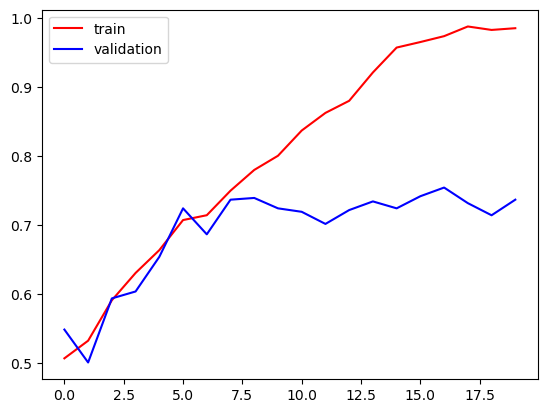

In [13]:
#Vẽ đồ thị: Đồ thị độ chính xác và mất mát của quá trình huấn luyện và kiểm tra
# Đồ thị này biểu diễn độ chính xác của mô hình trên tập huấn luyện (đường màu đỏ) 
# và tập kiểm tra (đường màu xanh) sau mỗi epoch. Độ chính xác là tỷ lệ giữa số lượng 
# dự đoán chính xác và tổng số lượng dự đoán. Mục tiêu là tối đa hóa độ chính xác.
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

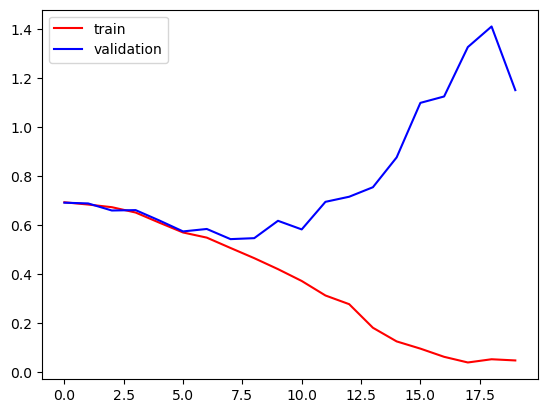

In [14]:
# Đồ thị này biểu diễn giá trị hàm mất mát của mô hình trên tập huấn luyện (đường màu đỏ) 
# và tập kiểm tra (đường màu xanh) sau mỗi epoch. 
# Giá trị hàm mất mát thể hiện mức độ sai lệch giữa kết quả dự đoán của mô hình 
# và giá trị thực tế. Mục tiêu là tối thiểu hóa giá trị hàm mất mát.
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
# Đọc hình ảnh
img_path = "dog1.jpg"
# img_path = "dog8.webp"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (100, 100))
img = img / 255.0

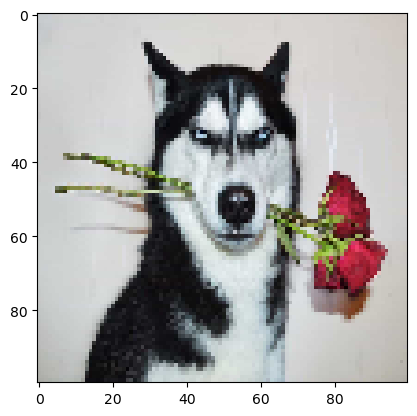

In [16]:
# Hiển thị hình ảnh
plt.imshow(img)
plt.show()

In [17]:
# Chuẩn bị dữ liệu cho mô hình
img_array = np.expand_dims(img, axis=0)

In [18]:
 # Dự đoán
img = img.reshape(1, 100, 100, 3)
pred = model.predict(img)[0][0]
pred = model.predict(img_array)
threshold = 0.5  # Đặt ngưỡng mong muốn
if pred < threshold:
    pred_label = 'Đây là con Dog'
else:
    pred_label = 'Đây là con Cat'

print(f'mô hình dự đoán là: {pred_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
mô hình dự đoán là: Đây là con Dog


In [19]:
# Đánh giá mô hình trên tập kiểm thử
validation_loss, validation_acc = model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7544 - loss: 1.0839


In [20]:
print("Độ chính xác trên tập kiểm thử: {:.2f}%".format(validation_acc * 100))
print("Hàm mất mát trên tập kiểm thử: {:.2f}".format(validation_loss))

Độ chính xác trên tập kiểm thử: 73.68%
Hàm mất mát trên tập kiểm thử: 1.15


In [21]:
# Dự đoán trên tập kiểm thử
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [22]:
# Tính toán các phép đo
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

In [23]:
#mô hình loại 
#Precision (Độ chính xác) 
#Recall (Độ phủ) 
#F1 Score (trung bình của Precision và Recall) 
#ROC AUC (Diện tích dưới đường cong ROC) 
print("Độ chính xác: {:.2f}".format(precision))
print("Độ phủ: {:.2f}".format(recall))
print("trung bình: {:.2f}".format(f1))
print("Diện tích: {:.2f}".format(roc_auc))

Độ chính xác: 0.76
Độ phủ: 0.69
trung bình: 0.73
Diện tích: 0.74
